<a href="https://colab.research.google.com/github/AvaPodrazhansky/Jevarah-Vision/blob/master/MachineLearningModels/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#imports for keras
%tensorflow_version 1.x
import keras
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam 
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [0]:
from numpy import array
from numpy import argmax
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline

In [0]:
train_path = '/content/drive/My Drive/GEN_DATA_TRAIN_TEST_VAL_unziped/GEN_DATA_TRAIN_TEST_VAL/train'
test_path = '/content/drive/My Drive/GEN_DATA_TRAIN_TEST_VAL_unziped/GEN_DATA_TRAIN_TEST_VAL/test'
valid_path = '/content/drive/My Drive/GEN_DATA_TRAIN_TEST_VAL_unziped/GEN_DATA_TRAIN_TEST_VAL/valid'

In [0]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224),classes=['nevus','basal_cell_carcinoma','vascular_lesion'],batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224),classes=['nevus','basal_cell_carcinoma','vascular_lesion'],batch_size=25)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224),classes=['nevus','basal_cell_carcinoma','vascular_lesion'],batch_size=10)

Found 950 images belonging to 3 classes.
Found 119 images belonging to 3 classes.
Found 119 images belonging to 3 classes.


In [0]:
imgs, labels = next(train_batches)

In [0]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


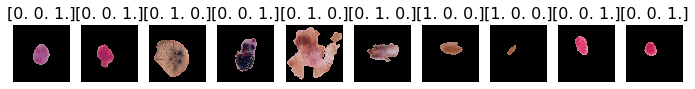

In [0]:
plots(imgs, titles=labels)

In [0]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=3, activation="softmax"))




In [0]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=10,generator=train_batches, validation_data= valid_batches, validation_steps=2,epochs=100,callbacks=[checkpoint,early])

Epoch 1/100
10/10 [==============================] - 27s 3s/step - loss: 1.0502 - accuracy: 0.4100 - val_loss: 0.8737 - val_accuracy: 0.7000
Epoch 2/100


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10/10 [==============================] - 31s 3s/step - loss: 0.9771 - accuracy: 0.5900 - val_loss: 0.7740 - val_accuracy: 0.6000
Epoch 3/100
10/10 [==============================] - 23s 2s/step - loss: 0.9275 - accuracy: 0.6100 - val_loss: 1.2130 - val_accuracy: 0.4500
Epoch 4/100
10/10 [==============================] - 24s 2s/step - loss: 1.1814 - accuracy: 0.4000 - val_loss: 1.0612 - val_accuracy: 0.6000
Epoch 5/100
10/10 [==============================] - 22s 2s/step - loss: 1.0699 - accuracy: 0.3600 - val_loss: 1.0835 - val_accuracy: 0.3500
Epoch 6/100
10/10 [==============================] - 26s 3s/step - loss: 1.0046 - accuracy: 0.4900 - val_loss: 0.9371 - val_accuracy: 0.2105
Epoch 7/100
10/10 [==============================] - 24s 2s/step - loss: 1.0142 - accuracy: 0.3700 - val_loss: 0.8822 - val_accuracy: 0.5000
Epoch 8/100
10/10 [==============================] - 26s 3s/step - loss: 0.9239 - accuracy: 0.5900 - val_loss: 1.0426 - val_accuracy: 0.3500
Epoch 9/100
10/10 [======

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


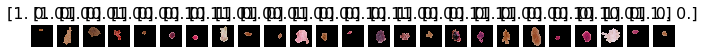

In [0]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs,titles=test_labels)

In [0]:
# test_labels = test_labels[:,0]
test_labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [0]:
predictions = model.predict_generator(test_batches,steps=1,verbose=1)

1/1 [==============================] - 0s 218ms/step


In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[0 0 3]
 [0 2 0]
 [0 0 1]]


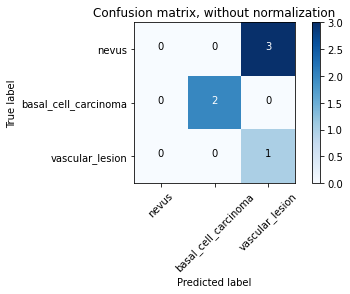

In [0]:
#first batch(10)
cnf_matrix = confusion_matrix(test_labels, y_pred,labels=['nevus','basal_cell_carcinoma','vascular_lesion'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['nevus','basal_cell_carcinoma','vascular_lesion'],
                      title='Confusion matrix, without normalization')

Confusion matrix, without normalization
[[0 0 3]
 [0 2 0]
 [0 0 1]]


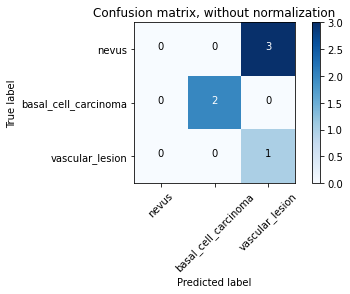

In [0]:
#first batch(20)
cnf_matrix = confusion_matrix(y_true, y_pred,labels=['nevus','basal_cell_carcinoma','vascular_lesion'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['nevus','basal_cell_carcinoma','vascular_lesion'],
                      title='Confusion matrix, without normalization')

In [0]:
#first batch(30)
cnf_matrix = confusion_matrix(y_true, y_pred,labels=['nevus','basal_cell_carcinoma','vascular_lesion'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['nevus','basal_cell_carcinoma','vascular_lesion'],
                      title='Confusion matrix, without normalization')